In [ ]:
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
# packages for hyperparameters tuning
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score, precision_score, recall_score
from sklearn.preprocessing import StandardScaler

import os
import numpy as np

import joblib

In [28]:
dataset = pd.read_csv("data/credit_risk_data_processed.csv")

In [29]:
# Standardize the data
scaler = StandardScaler()
X = dataset.drop('default', axis=1)
y = dataset['default']
X = scaler.fit_transform(X)

In [30]:
# Split the dataset into training and testing sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)

In [31]:
# Get size of the dataset
print("Training set size: ", len(X_train))
print("Validation set size: ", len(X_val))
print("Test set size: ", len(X_test))

Training set size:  20619
Validation set size:  5155
Test set size:  2864


In [32]:
# Define models
models = {
    'Logistic Regression': LogisticRegression(max_iter=100, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Support Vector Classifier': SVC(probability=True, random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'Naive Bayes': GaussianNB(),
    'Stochastic Gradient Descent': SGDClassifier(random_state=42), 
    'XGBoost': XGBClassifier(random_state=42), 
    "AdaBoost": AdaBoostClassifier(random_state=45),
    "LightGBM": LGBMClassifier(boosting_type='gbdt', bagging_fraction=0.9, learning_rate=0.05, feature_fraction=0.9, bagging_freq=50, verbosity=-1),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42), 
    "CatBoost": CatBoostClassifier(verbose=0, random_state=42)
}

In [33]:
results = []
trained_model = {}
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on validation set
    y_val_pred = model.predict(X_val)
    trained_model[name] = model 
    print("Model: ", name)
    print("Accuracy: ", accuracy_score(y_val, y_val_pred))
    print("F1: ", f1_score(y_val, y_val_pred))
    print("Precision: ", precision_score(y_val, y_val_pred))
    print("Recall: ", recall_score(y_val, y_val_pred))
    print("\n")

Model:  Logistic Regression
Accuracy:  0.8211445198836081
F1:  0.3820375335120643
Precision:  0.515370705244123
Recall:  0.3035143769968051


Model:  Decision Tree
Accuracy:  0.826188166828322
F1:  0.5289169295478444
Precision:  0.5223260643821391
Recall:  0.5356762513312034


Model:  Random Forest
Accuracy:  0.8221144519883609
F1:  0.4942084942084942
Precision:  0.5125858123569794
Recall:  0.47710330138445156


Model:  Support Vector Classifier
Accuracy:  0.8172647914645975
F1:  0.30428360413589367
Precision:  0.4963855421686747
Recall:  0.21938232161874335


Model:  K-Nearest Neighbors
Accuracy:  0.8104752667313289
F1:  0.4103802051901026
Precision:  0.4735376044568245
Recall:  0.362087326943557


Model:  Naive Bayes
Accuracy:  0.817458777885548
F1:  0.4632059326868226
Precision:  0.4987714987714988
Recall:  0.4323748668796592


Model:  Stochastic Gradient Descent
Accuracy:  0.8193986420950533
F1:  0.3521224773834377
Precision:  0.5080321285140562
Recall:  0.26943556975505856


Model

In [34]:
# Define parameter grids for grid search
param_rf = {
    'n_estimators': [100, 200, 500],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'max_features': ['sqrt', 'log2', None],
}
param_cat = {
    'iterations': [500, 700, 1000],
    'learning_rate': [0.01, 0.05, 0.1],
    'depth': [4, 6, 8, 10],
    'l2_leaf_reg': [1, 3, 5, 7],
    'border_count': [32, 64, 128],
}
param_lgbm = {
    'n_estimators': [100, 200, 500],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'num_leaves': [15, 31, 63],
    'feature_fraction': [0.6, 0.8, 1.0],
    'bagging_fraction': [0.6, 0.8, 1.0],
}

In [35]:
# GridSearchCV for each model
grid_rf = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid=param_rf,
    cv=2,
    scoring='recall',
    verbose=1,
    n_jobs=-1
)
grid_cat = GridSearchCV(
    CatBoostClassifier(verbose=0, random_state=42),
    param_grid=param_cat,
    cv=2,
    scoring='recall',
    verbose=1,
    n_jobs=-1
)
grid_lgbm = GridSearchCV(
    LGBMClassifier(random_state=42),
    param_grid=param_lgbm,
    cv=2,
    scoring='recall',
    verbose=1,
    n_jobs=-1
)

In [37]:
# Fitting the models
grid_rf.fit(X_train, y_train)
grid_cat.fit(X_train, y_train)
grid_lgbm.fit(X_train, y_train)

Fitting 2 folds for each of 243 candidates, totalling 486 fits
Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\celin_e3kjw6h\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py", line 3550, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\celin_e3kjw6h\AppData\Local\Temp\ipykernel_23728\3488158326.py", line 2, in <module>
    grid_rf.fit(X_train, y_train)
  File "c:\Users\celin_e3kjw6h\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Users\celin_e3kjw6h\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_search.py", line 970, in fit
    self._run_search(evaluate_candidates)
  File "c:\Users\celin_e3kjw6h\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_search.py", line 1527, in _run_search
    evaluate_candidates(ParameterGrid(self.param_grid))
  File "c:\Users\celin_e3kjw6h\AppData\Local\Programs\Python\Python39\l

In [39]:
models = {
    'Random Forest': RandomForestClassifier(**grid_rf.best_params_, random_state=42),
    'CatBoost': CatBoostClassifier(**grid_cat.best_params_, verbose=0, random_state=42),
    "LightGBM": LGBMClassifier(**grid_lgbm.best_params_, random_state=42),
}

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\celin_e3kjw6h\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py", line 3550, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\celin_e3kjw6h\AppData\Local\Temp\ipykernel_23728\235914342.py", line 2, in <module>
    'Random Forest': RandomForestClassifier(**grid_rf.best_params_, random_state=42),
AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\celin_e3kjw6h\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py", line 2144, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
  File "C:\Users\celin_e3kjw6h\AppData\Roaming\Python\Python39\site-packages\IPython\core\ultratb.py", line 1435, in structured_traceback
    return FormattedTB.structured_traceback(
  File "C:\Users\celin_e3kjw6h\AppData\R

In [ ]:
# Save all three models
def save_model(model, model_name):
    joblib.dump(model, f"models/{model_name}.joblib")
    print(f"Model {model_name} saved to models/{model_name}.joblib")
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on validation set
    y_test_pred = model.predict(X_test)
    print("Model: ", name)
    save_model(model, name)
    print("\n")

In [40]:
models_list = ["Random Forest", "CatBoost", "LightGBM"]

In [41]:
# Load the models
def load_model(model_name):
    model = joblib.load(f"models/{model_name}.joblib")
    print(f"Model {model_name} loaded from models/{model_name}.joblib")
    return model
loaded_models = {}
for name in models_list:
    loaded_models[name] = load_model(name)
    # Train the model
    model.fit(X_train, y_train)
    loaded_models[name] = model

Model Random Forest loaded from models/Random Forest.joblib
Model CatBoost loaded from models/CatBoost.joblib
Model LightGBM loaded from models/LightGBM.joblib


In [45]:
info = {'age': 40, 'income': 55000, 'living': 1, 'employment': 40, 'purpose': 2, 'amount': 15000, 'interest': 4, 'percentage': 10, 'status': 2, 'bank_years': 15}

In [49]:
age = info['age']
income = info['income']
living = info['living']
employment = info['employment']
purpose = info['purpose']
amount = info['amount']
interest = info['interest']
percentage = info['percentage']
status = info['status']
bank_years = info['bank_years']
customer_id = 123456
input_data = np.array([[customer_id, age, income, living, employment, purpose, amount, interest, percentage, status, bank_years]])
input_data = scaler.transform(input_data)

2025-04-17 12:33:31,921 WARNING: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names



In [51]:
model_name = "Random Forest"
# Load the model and make predictions here
model = joblib.load(f"models/{model_name}.joblib")
print(f"Model {model_name} loaded from models/{model_name}.joblib")
print("Got information from the form, now predicting...")
prediction = model.predict(input_data)
if prediction[0] == 1:
    prediction = "You will default on your loan."
else:
    prediction = "You will not default on your loan."
print(f"Prediction made: {prediction}")

Model Random Forest loaded from models/Random Forest.joblib
Got information from the form, now predicting...
Prediction made: You will not default on your loan.


In [42]:
def evaluate_models(X, y):
    for name, model in loaded_models.items():
        y_pred = model.predict(X)
        print("Model: ", name)
        print("Accuracy: ", accuracy_score(y, y_pred))
        print("F1: ", f1_score(y, y_pred))
        print("Precision: ", precision_score(y, y_pred))
        print("Recall: ", recall_score(y, y_pred))
        print("\n")

In [43]:
# Get classification report
def get_classification_report(X, y):
    for name, model in loaded_models.items():
        y_pred = model.predict(X)
        print("Model: ", name)
        print("Classification Report: \n", classification_report(y, y_pred))
        print("\n")

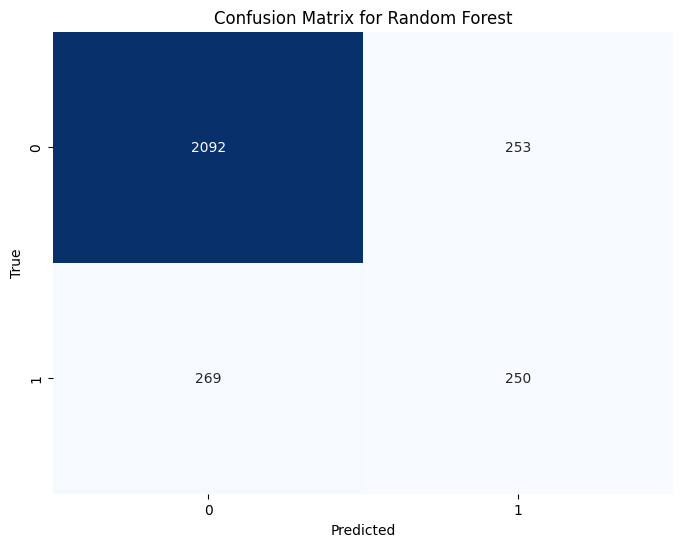

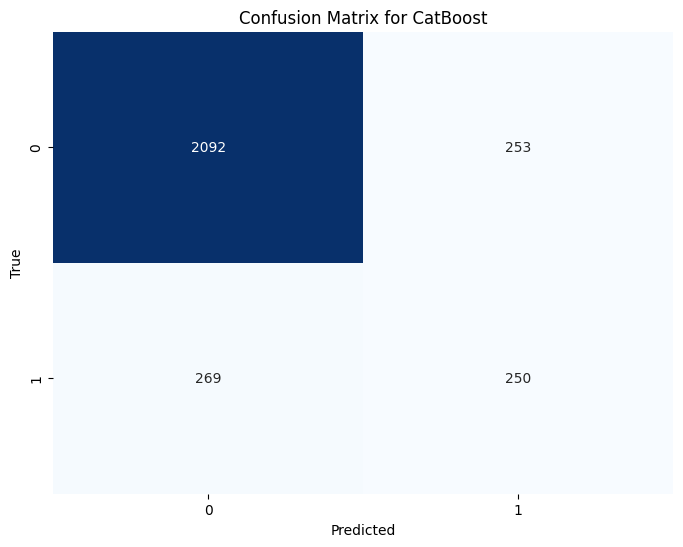

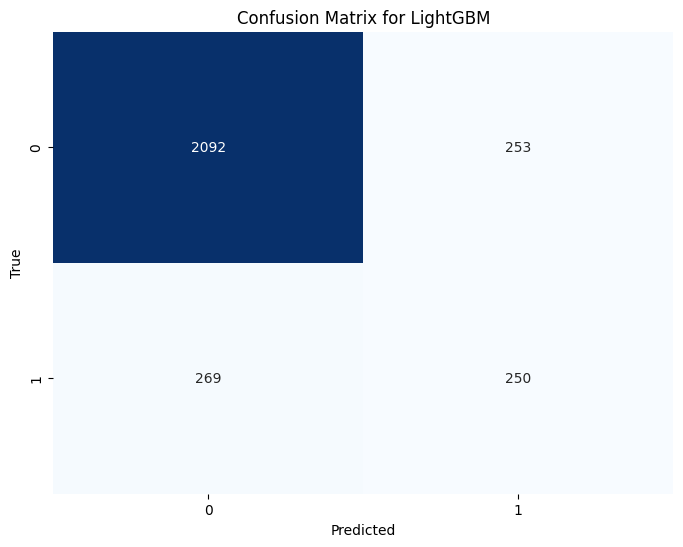

In [44]:
# Plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()
    
for name, model in loaded_models.items():
    y_test_pred = model.predict(X_test)
    plot_confusion_matrix(y_test, y_test_pred, name)
    print("\n")